<a href="https://colab.research.google.com/github/SamoaChen/Modern_Control/blob/main/Modern_Control_HW4_Classical_Control_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install control

1) Reproduce Example 2.7

2) Reproduce Example 2.8

3) Reproduce Example 2.9

4) Reproduce Example 2.12 (Note that the disturbance model of the book is very general!)

In [ ]:
#-----Import packages
import math
import numpy as np
import control as ctrl
from control.matlab import *
import matplotlib.pyplot as plt

#$Part1$

In [ ]:
#-----Reproduce Example 2.7
# Define s
s = tf('s')

# Parameters
z = 0.1
tau = 1
# Define L, T
L = (-s+z)/(tau*s+tau*z+2)/s
T = (-s+z)/(s+z)/(tau*s+1)
S = 1 -T
# Show zeros for L, T
print('\'L\'has one zero at: %1.1f, \'T\' has one zero at: %1.1f' %(ctrl.zero(L)[0],ctrl.zero(T)[0]))

# Calculate GM, PM, Ms, Mt
mag, phase, omega = bode(L, omega, plot=False)
magS, phaseS, omega = bode(S, omega, plot=False)
magT, phaseT, omega = bode(T, omega, plot=False)

gm, pm, wg, wp = margin(L)
Ms = max(magS) #maximum value of sensitivity function
Mt = max(magT) #maximum value of complementary sensitivity function
print('The parameters of the open loop transfer function, sensitivity function and complementary function are listed below')
print('GM = %1.1f, PM = %1.1f, M_S = %1.2f, M_T = %1.2f'%(gm, pm, Ms, Mt))

'L'has one zero at: 0.1, 'T' has one zero at: 0.1
The parameters of the open loop transfer function, sensitivity function and complementary function are listed below
GM = 2.1, PM = 60.1, M_S = 1.93, M_T = 1.00


In [ ]:
# Calculate wb
magS_dB_shift = np.absolute(20*np.log(magS)-20*np.log(1/math.sqrt(2)))
pos_wb = np.where(magS_dB_shift==min(magS_dB_shift))[0][0]
w_b = omega[pos_wb]

# Calculate wbt
magT_dB_shift = np.absolute(20*np.log(magT)-20*np.log(1/math.sqrt(2)))
pos_wbt = np.where(magT_dB_shift==min(magT_dB_shift))[0][0]
w_bt = omega[pos_wbt]

print('\'w_B\'is %1.3f rad/s, \'w_BT\' is %1.3f rad/s.' %(w_b,w_bt))

'w_B'is 0.036 rad/s, 'w_BT' is 1.000 rad/s.


1/w_B is a better indicator of CL performance, given by the text book, and it is also worth noting that a T magnitude close to 1 need to be accompnanied by correct phase to give good tracking. On the other hand, when S has a small magnitude, it doesn't really matter what phase it has.

Text(0.5, 1.0, 'Figure 2.17: Step Response for system T')

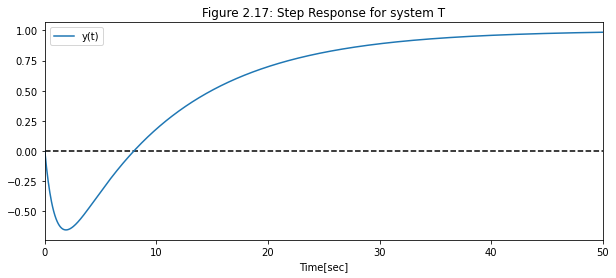

In [ ]:
#-----Step response of L 
# Range of Simulation
t = np.linspace(0,50,1000)

fig, ax = plt.subplots(figsize=(10,4))
yout, T_time = step(T, t)
plt.plot(T_time,yout,label='y(t)')
plt.hlines(0,0,50,ls='--')
plt.xlim(0,50)
plt.legend()

ax.set_xlabel('Time[sec]')
ax.set_title('Figure 2.17: Step Response for system T')

In [ ]:
# Calulate rise time
for value in yout:
  if value >= 0.9:
    pos_rise = np.where(yout==value)[0][0]
    print('The rise time is: %1.3f s' %T_time[pos_rise])
    break

The rise time is: 31.031 s


The rise time is when the function reached 90% of its peak value.

<function matplotlib.pyplot.show>

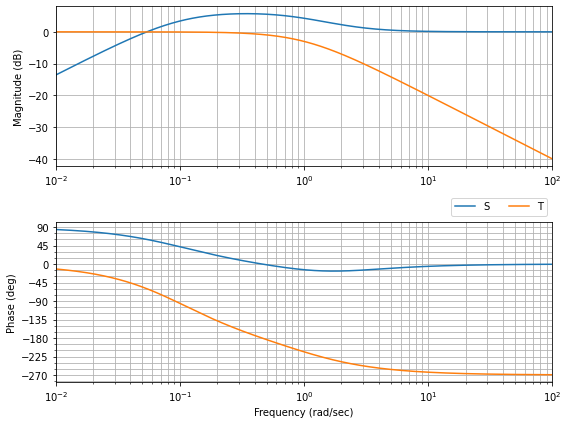

In [ ]:
#-----Bode plot for T,S figure 2.18
fig,ax = plt.subplots(figsize=(8,6))
omega = np.logspace(-2, 2, 10000)
magS, phaseS, omega = bode(S, omega)
magT, phaseT, omega = bode(T, omega)
plt.legend(["S", "T"],bbox_to_anchor=(0, 1.01, 1, 0), loc=4, ncol=3)
plt.xlim(1e-2,100)
#plt.ylim(-400,300)
plt.tight_layout()
plt.show



#$Part2$

The parameters of the open loop transfer function, sensitivity function and complementary function are listed below
GM = 2.9, PM = 53.8, wc = 0.15, M_S = 1.75, M_T = 1.11


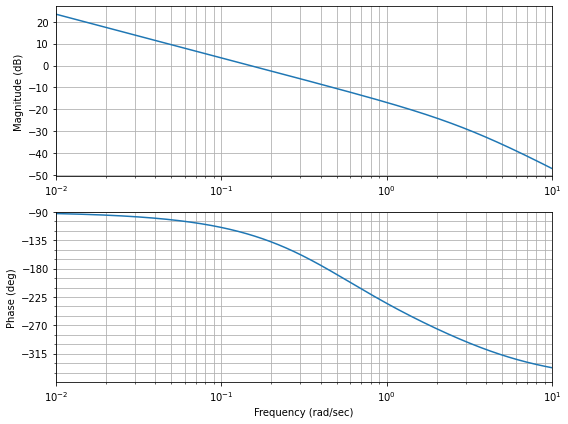

In [ ]:
#-----Reproduce Example 2.8
# Parameters
Kc = 0.05
# Define G
G = 3*(-2*s+1)/(10*s+1)/(5*s+1)
# Define designed L, S, T
L = 3*Kc*(-2*s+1)/(2*s+1)/(0.33*s+1)/s
S = 1/(1+L)
T = 1-S
# Define corresponding controller
K = Kc*(10*s+1)*(5*s+1)/(2*s+1)/(0.33*s+1)/s 

#----Bode plot for L Figure 2.19
fig,ax = plt.subplots(figsize=(8,6))
omega = np.logspace(-2, 1, 10000)
mag, phase, omega = bode(L, omega)
plt.xlim(1e-2,10)
plt.ylim(-360,-90)
plt.tight_layout()
plt.show

# Calculate GM, PM, Ms, Mt
mag, phase, omega = bode(L, omega, plot=False)
magS, phaseS, omega = bode(S, omega, plot=False)
magT, phaseT, omega = bode(T, omega, plot=False)

gm, pm, wg, wp = margin(L)
Ms = max(magS) #maximum value of sensitivity function
Mt = max(magT) #maximum value of complementary sensitivity function
#Find wc
mag_shift = 20*np.log(mag)
for value in mag_shift:
  if value <= 0:
    pos_cross = np.where(mag_shift==value)[0][0]
    wc = omega[pos_cross]
    break

print('The parameters of the open loop transfer function, sensitivity function and complementary function are listed below')
print('GM = %1.1f, PM = %1.1f, wc = %1.2f, M_S = %1.2f, M_T = %1.2f'%(gm, pm, wc, Ms, Mt))

Text(0.5, 1.0, 'Figure 2.17: Step Response for system T')

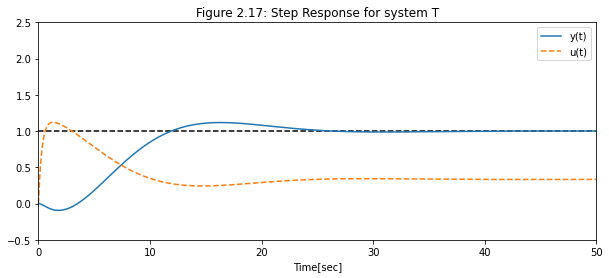

In [ ]:
#-----Step response Figure 2.20
# Define CL sys tf
G_sys = L/(1+L)
# Define input signal tf
U = K/(1+L)

# Range of Simulation
t = np.linspace(0,50,1000)

fig, ax = plt.subplots(figsize=(10,4))
yout, T_time = step(G_sys, t)
yout_u, T_time_u = step(U, t)
plt.plot(T_time,yout,label='y(t)')
plt.plot(T_time_u,yout_u,label='u(t)', ls='--')
plt.hlines(1,0,50,ls='--')
plt.xlim(0,50)
plt.ylim(-0.5,2.5)
plt.legend()

ax.set_xlabel('Time[sec]')
ax.set_title('Figure 2.17: Step Response for system T')

Given notice to the small controller gain, which leads to a desired small input signal.

#$Part3$

1. Command tracking: The rise time (to reach %90 of the final value) should be less than 0.3s and the overshoot should be less than 5%.
2. Disturbance rejection: The output in response to a unit step disturbance should remain within the range [-1,1] at all times, and it should return to 0 as quickly as possible ($|y(t)|$ should at least be
less than 0.1 after 3s).
3. Input constraints: $u(t)$ should remain within the range [-1,1] at all times to avoid input saturation
(this is easily satisfied for most designs).

In [ ]:
#-----Reproduce Example 2.9
# Define G, Gd
G = 200/(10*s+1)/(0.05*s+1)/(0.05*s+1)
Gd = 100/(10*s+1)
# Find frequency when Gd <=1
omega = np.logspace(-2, 1, 10000)
mag, phase, omega = bode(Gd, omega, plot=False)
mag_shift = 20*np.log(mag)
for value in mag_shift:
  if value <= 0:
    pos_cross = np.where(mag_shift==value)[0][0]
    w_dis = omega[pos_cross]
    print('|Gd|<=1 at frequency above %1.2f rad/s'%w_dis)
    break

|Gd|<=1 at frequency above 10.00 rad/s


Text(0.5, 1.0, 'Figure 2.22 (a): Tracking response')

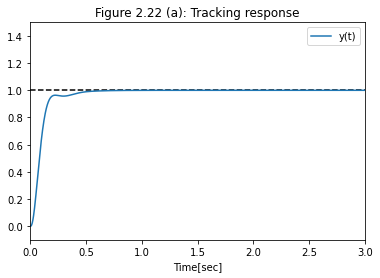

In [ ]:
# set cross over frequency
wc = w_dis
# Define the inverse-based controller
K0 = wc*(10*s+1)*(0.1*s+1)/(0.01*s+1)/s/200
# Corresponding CL transfer function
L = K0*G
G_sys = L/(1+L)

#-----Step Tracking Figure2.22 (a)
# Range of Simulation
t = np.linspace(0,3,1000)

fig, ax = plt.subplots(figsize=(6,4))
yout, T_time = step(G_sys, t)
plt.plot(T_time,yout,label='y(t)')
plt.hlines(1,0,3,ls='--')
plt.xlim(0,3)
plt.ylim(-0.1,1.5)
plt.legend()

ax.set_xlabel('Time[sec]')
ax.set_title('Figure 2.22 (a): Tracking response')


Text(0.5, 1.0, 'Figure 2.22 (b): Disturbance response for 23s')

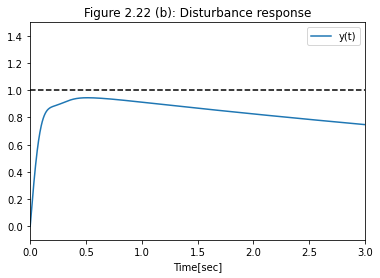

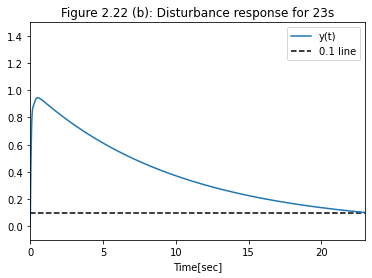

In [ ]:
#-----Disturbance Response Figure 2.22 (b)
# Define distrubance tf
S = 1/(1+L)
G_dis = S*Gd

#-----Step Tracking Figure2.22 (a)
# Range of Simulation
t = np.linspace(0,3,1000)

fig, ax = plt.subplots(figsize=(6,4))
yout, T_time = step(G_dis, t)
plt.plot(T_time,yout,label='y(t)')
plt.hlines(1,0,3,ls='--')
plt.xlim(0,3)
plt.ylim(-0.1,1.5)
plt.legend()

ax.set_xlabel('Time[sec]')
ax.set_title('Figure 2.22 (b): Disturbance response')
plt.show

# Disturbance response after 23 s
# Range of Simulation
t = np.linspace(0,23,1000)

fig, ax = plt.subplots(figsize=(6,4))
yout, T_time = step(G_dis, t)
plt.plot(T_time,yout,label='y(t)')
plt.hlines(0.1,0,23,ls='--',label='0.1 line')
plt.xlim(0,23)
plt.ylim(-0.1,1.5)
plt.legend()

ax.set_xlabel('Time[sec]')
ax.set_title('Figure 2.22 (b): Disturbance response for 23s')

The inverse based controller gives desirable reference tracking but poor disturbance rejection. According to the second graph above, it takes about 23s to reach 0.1.

#$Part4$

<function matplotlib.pyplot.show>

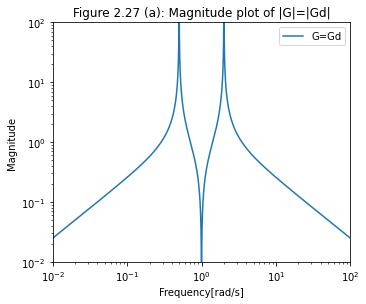

In [ ]:
#-----Reproduce Example 2.12
# Define G, Gd
G = 2.5*s*(s*s+1)/(s*s+0.25)/(s*s+4)
Gd = G

# Bode plot for G
omega = np.logspace(-2, 2, 10000)
mag, phase, omega = bode(Gd, omega, dB=False, plot=False)

fig,ax = plt.subplots(figsize=(5,4))
plt.plot(omega,mag,label='G=Gd')
plt.xlim(1e-2,100)
plt.ylim(1e-2,100)
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.legend()
ax.set_xlabel('Frequency[rad/s]')
ax.set_ylabel('Magnitude')
ax.set_title('Figure 2.27 (a): Magnitude plot of |G|=|Gd|')
plt.show

Text(0.5, 1.0, 'Figure 2.27 (b): OL & CL disturbance step response')

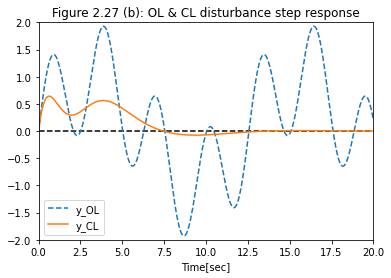

In [ ]:
# Define controller
K = 1
# Define corresponding L, S, G_dis
L = K*G
S = 1/(1+L)
G_dis = S*Gd

# Open-loop and close-loop disturbance step response
# Range of Simulation
t = np.linspace(0,20,1000)

fig, ax = plt.subplots(figsize=(6,4))
yout, T_time = step(Gd, t)
yout_d, T_time_d = step(G_dis, t)
plt.plot(T_time,yout,label='y_OL',ls='--')
plt.plot(T_time_d,yout_d,label='y_CL')
plt.hlines(0,0,20,ls='--')
plt.xlim(0,20)
plt.ylim(-2,2)
plt.legend()

ax.set_xlabel('Time[sec]')
ax.set_title('Figure 2.27 (b): OL & CL disturbance step response')

By using the good initial loop shaping controller model, $G^{-1}G_{d}$, the time domain response settles faster with less overshoot.